### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


Import modules and initalize

In [2]:
sys.path.append('../')
from scripts.preprocess import Preprocess
from scripts.logger import Logger
from scripts.plot import Plot

preprocess = Preprocess()
plot = Plot()

### Load DataFrame

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
store_df = pd.read_csv('../data/store.csv')
sub_df = pd.read_csv('../data/sample_submission.csv')


/home/nardos/Documents/10Academy/Pharmaceutical/Pharmaceutical-Sales-Prediction/pharma_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test_df.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


The train and test data contain daily sales information for each store.

In [6]:
test_df["Promo"].unique()

array([1, 0])

In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


The store data gives us information about each store


In [8]:
sub_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
# test_df.groupby(by = "Cutomers")

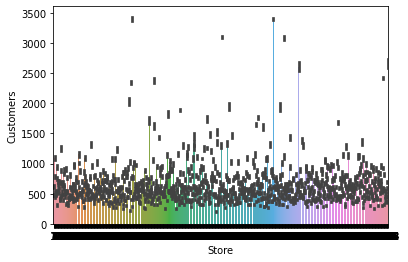

In [10]:

sns.barplot(x = 'Store',
            y = 'Customers',
            data = train_df)
 
plt.show()

In [11]:

# sns.barplot(x = 'Store',
#             y = 'Customers',
#             data = test_df)
 
# plt.show()

In [12]:
train_df = pd.merge(train_df, store_df, how='inner', on='Store')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
test_df = pd.merge(test_df, store_df, how='inner', on='Store')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [14]:
# Change train_df date column to datetime
train_df = preprocess.to_datetime(train_df, 'Date')
train_df.head(10)

AttributeError: 'Preprocess' object has no attribute 'convert_to_datetime'

In [ ]:
# Change test_df date column to datetime
test_df = preprocess.convert_to_datetime(test_df, 'Date')

In [ ]:
#setting Data as an index
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

### Missing values

In [ ]:
# Missing data in the train data
preprocess.get_missing_data_percentage(train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceWeek,508031,49.9
Promo2SinceYear,508031,49.9
CompetitionOpenSinceYear,323348,31.8
CompetitionOpenSinceMonth,323348,31.8
CompetitionDistance,2642,0.3
Promo,0,0.0
DayOfWeek,0,0.0
Sales,0,0.0
Customers,0,0.0


PromoInterval, Promo2SinceYear, Promo2SinceWeek, CompetitionOpenSinceMonth,CompetitionOpenSinceYear, CompetitionDistance and Open have missing values in the train data. So they need to be filled with the mean, median and zero values.

In [15]:
# Fill 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance' with mean values

fill_mean = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_df = preprocess.fill_median(train_df, fill_mean)
test_df = preprocess.fill_median(test_df, fill_mean)

# Fill the PromoInterval with mode values
train_df = preprocess.fill_mode(train_df, ['PromoInterval'])
test_df = preprocess.fill_mode(test_df, ['PromoInterval'])

# Fill Open with 0 in test data 
test_df = preprocess.fill_with_zero(test_df, ['Open'])

# Overview of missing data
preprocess.missing_values(test_df)

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Outliners

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nardos/Documents/10Academy/Pharmaceutical/Pharmaceutical-Sales-Prediction/pharma_env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/nardos/Documents/10Academy/Pharmaceutical/Pharmaceutical-Sale

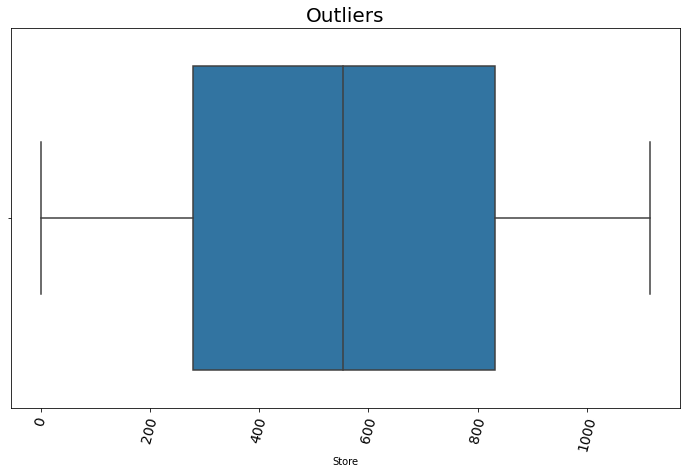

In [16]:
plot.plot_box(test_df, 'Store', 'Outliers')

Replace Outliers with IQR

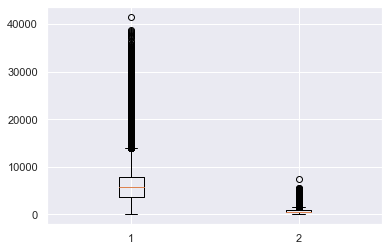

In [17]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()